# Description: 
    For the first 3 cells I used basic dataframes and analytics to conclude the answer to part 1. With headings you will see my detailed answers to the questions listed in the assignment. I tried my best to incoorporate comments where possible. 
    
    For my Logistical Regression I trained the model on the standard test_size=0.20, random_state=12. 
    I ran the test and it came back with a 94% accuracy. I ran the simulation 10 times and concluded that there was a different probability for each type of accident/nonaccident- confirming my suspicion in the first series of tests. 
    
    I concluded that the only data being taken into account was the time worked, even when i removed the firm column i got the same results in terms of accuracy and results- that is unless I did something wrong. 
    
    
I tried my best on this project but in all honesty its still a bit confusing to me, espeically the machine learning part. I hope I did it correctly. 
    


In [1]:
#Alex Sanna
#this is my HW3, focusing on logical regression. 



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#basic setup and imports for the program 

In [37]:
#in this cell we will sort the data into parallel arrays but we're only going to pay attention to the CLASS coloumn
#as well as the time worked to decipher a relationship between the two. 
#Utilizing 2 separate parallel arrays we sacrifice some time, but we also get rid of unnessecary information 

file = open('FRAFirm.csv', 'r')
data = []

def chr_int(a):
    if a.isdigit(): return int(a)
    else: return 0

for line in file:
    data1 = line.split(',')
    data.append([chr_int(data1[1]), chr_int(data1[4])])
    

    
colnames = ['type', 'time']
df = pd.DataFrame(data, columns = colnames)

df

#i created a simple data frame to organize the data and see what I'm looking at. 
    

,type,time
0,0,0
1,0,320
2,0,360
3,0,465
4,0,375
...,...,...
38755,0,420
38756,0,375
38757,0,520
38758,0,555


In [7]:
#classifying the data. getting some values 

type0 = df[df.type == 0]
type1 = df[df.type == 1]
type2 = df[df.type == 2]
mean = df.time.mean()
print("The average time worked: ")
print(mean)
x = df.time.quantile([0.75])
print("The 3rd quartile is: ")
print(x)
#the average time worked is around 600. this is very useful to know when we try to come to a conclusion. 
fatigued = df[df.time > 720 ]
total = df[df.time > 0]
print("The percentage of workers that were technically fatigued")
print(fatigued.size/total.size * 100)
#this calculation concludes that 32% of all workers were technically fatigued. 
#***FOR THIS APPLICATION WE CLASSIFY FATIGUED AS A TIME > 700***
print("the percentage of shifts w no accidents ")
print(type0.size / total.size *100)
print("the percentage of shifts with type 1 accidents ")
print(type1.size / total.size *100)
print("the percentage of shifts with type 2 accidents ")
print(type2.size / total.size *100)
#93% of all shifts had no accidents. 
#almost 5% had a type 1 accident 
#almost 2% had a type 2 accident

# we are looking for a percentage that indicates the percentage of people who were fatigued AND an accident occured.

fatDF = pd.DataFrame(fatigued, columns = colnames)
numberOfFatiguedT1Accidents = fatDF[fatDF.type == 1]
print("the number of TYPE 1 accidents from fatigued workers")
print(numberOfFatiguedT1Accidents.size)

print("the percentage of TYPE 1 accidents that occured by fatigued workers ")
value = numberOfFatiguedT1Accidents.size/type1.size * 100 
print(value)

numberOfFatiguedT2Accidents = fatDF[fatDF.type == 2]
print("the percentage of TYPE 2 accidents that occured by fatigued workers")
value2 = numberOfFatiguedT2Accidents.size/type2.size * 100 
print(value2)

print()
print("This is irrefutable evidence that the amount of hours directly coorolates to the amount of accidents.")
print("I would argue that the two types of accidents are relatively the same in terms of causes. there is only a 10% discrepentcy.")

The average time worked: 
598.3848555211558
The 3rd quartile is: 
0.75    720.0
Name: time, dtype: float64
The percentage of workers that were technically fatigued
22.766325240589282
the percentage of shifts w no accidents 
93.40282257024175
the percentage of shifts with type 1 accidents 
4.816945741634201
the percentage of shifts with type 2 accidents 
1.7828117340488658
the number of TYPE 1 accidents from fatigued workers
2342
the percentage of TYPE 1 accidents that occured by fatigued workers 
62.72094268880557
the percentage of TYPE 2 accidents that occured by fatigued workers
54.41389290882779

This is irrefutable evidence that the amount of hours directly coorolates to the amount of accidents.
I would argue that the two types of accidents are relatively the same in terms of causes. there is only a 10% discrepentcy.


# The answer to the first question: 
    Given that an accident of type one occrred, the probability of that worker being fatigued is about 63%. 
    Given that an accident of type two occrred, the probability of that worker being fatigued is about 54%.
    I conclude these numbers are not similar enough to say that the two types of accidents are indistinguishable.
    
    
    
    
    




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
''

In [117]:
colnames1 = ['firm', 'Class', 'start','end','length', 'night', 'gap', 'ws', 'idx','base','startadj','lenadj','comp', 'trans', 'press','p1s','p1l','p2s','p2l','maladj','nfz','afz','mfz']
datafile = open('FRAFirm.csv', 'r')

data = []

def chr_int(a):
    if a.isdigit(): return int(a)
    else: return 0

for line in datafile:
    data1 = line.split(',')
    if data1[0] == "FIRM":
        x = 1
  
    else: 
        data.append([chr_int(data1[0]), data1[1],data1[2],data1[3],chr_int(data1[4]),data1[5],data1[6],data1[7],data1[8],data1[9],data1[10],data1[11],data1[12],data1[13],data1[14],data1[15],data1[16],data1[17],data1[18],data1[19],data1[20], data1[21],data1[22],] )
    

df1 = pd.DataFrame(data, columns = colnames1)
sum(df1.duplicated())
df1.drop_duplicates(inplace = True)


In [118]:
y = df1.Class
X = df1.iloc[:, df1.columns != 'Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12, stratify=y)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

X.head

<bound method NDFrame.head of        firm start   end  length night  gap ws idx  base startadj  ...  trans  \
0         0   290   610     320     0  999  0   6  5.00    -3.25  ...  -4.00   
1         0   905  1265     360     0  295  0   6  5.00    -3.25  ...  -4.00   
2         5  1040  1505     465     0  999  1   1  5.00     0.00  ...   0.00   
3         4   920  1295     375     0  855  0   2  5.00     0.00  ...   0.00   
4         1  1280  1775     495     1  999  1   1  2.00     0.00  ...  -1.00   
...     ...   ...   ...     ...   ...  ... ..  ..   ...      ...  ...    ...   
38754     0   855  1275     420     0  999  0   6  5.00     0.00  ...  -3.00   
38755     0   105   480     375     1  999  0   7  2.00     0.00  ...  -5.00   
38756     0   360   880     520     0  999  0   8  5.00    -2.00  ...  -6.00   
38757     0   720  1275     555     0  999  0   9  5.00     0.00  ...  -6.00   
38758     0  1245  2035     790     1  999  0  10  2.00     0.00  ...  -8.00   

       pr

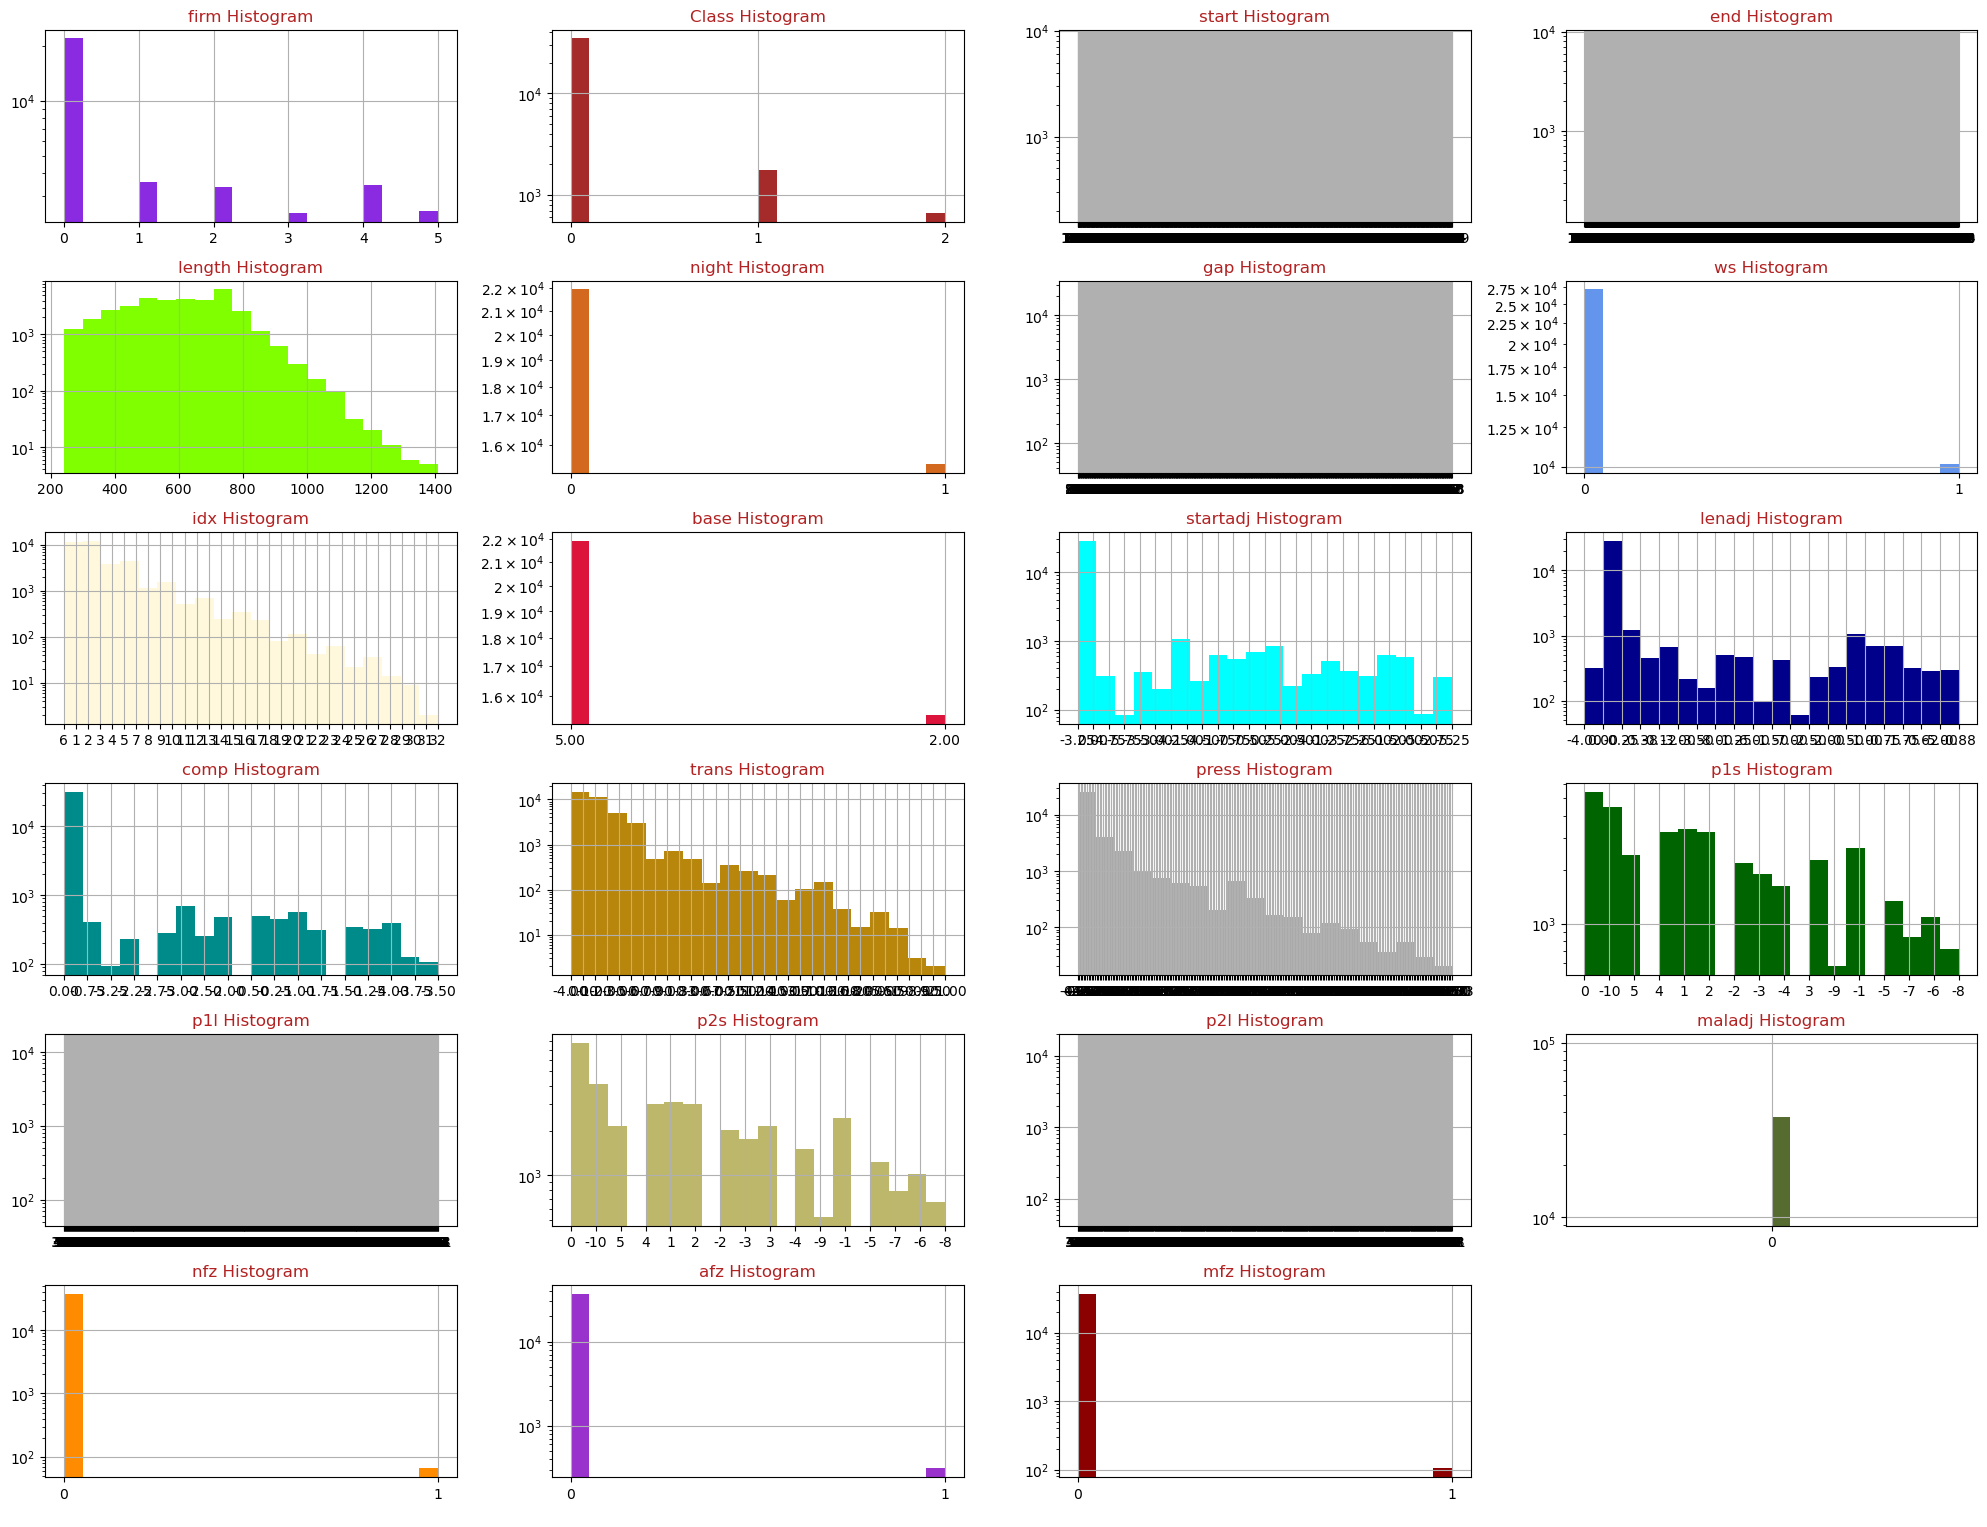

In [119]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
fig = plt.figure(figsize=(20,20))
for i, feature in enumerate(df1.columns):
    f = fig.add_subplot(8, 4, i + 1)
    df1[feature].hist(bins = 20, ax = f, facecolor = colors[i])
    f.set_title(feature + " Histogram", color = colors[35])
    f.set_yscale('log')
fig.tight_layout()
plt.show()

In [81]:
model = LogisticRegression();
model.fit(X_train_scaled, y_train)
train_accuracy = model.score(X_train_scaled, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 94.52%
The accuracy for the test set is 94.34%


/Users/alexsanna/Desktop/HW3/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
prob = model.predict_proba(X_test_scaled[:50])
prob

array([[0.97745228, 0.01569209, 0.00685563],
       [0.90921457, 0.06237196, 0.02841347],
       [0.8829638 , 0.09039664, 0.02663957],
       [0.9392737 , 0.04520547, 0.01552083],
       [0.99136393, 0.00512962, 0.00350645],
       [0.97440614, 0.01750149, 0.00809237],
       [0.99520621, 0.0023472 , 0.00244659],
       [0.95710878, 0.02620899, 0.01668223],
       [0.98317958, 0.01016297, 0.00665746],
       [0.91836948, 0.06005987, 0.02157065],
       [0.96954631, 0.02305009, 0.0074036 ],
       [0.98227352, 0.01097513, 0.00675135],
       [0.94737135, 0.03924423, 0.01338442],
       [0.96010269, 0.02632192, 0.01357539],
       [0.99625701, 0.00224327, 0.00149972],
       [0.95958658, 0.02549404, 0.01491938],
       [0.96096928, 0.02451609, 0.01451463],
       [0.98607355, 0.00741983, 0.00650662],
       [0.94913398, 0.03287768, 0.01798834],
       [0.97611323, 0.01668186, 0.0072049 ],
       [0.9798837 , 0.01496091, 0.0051554 ],
       [0.78552196, 0.16288885, 0.05158919],
       [0.

# Answer to number 2
this regression answers the question with 94% accuracy. 


# Answer to number 3
By looking at the code, tables and the data, i conclude that the only viable columns being used to actually predict
what will happen is the time duration of the shift and the FIRM code. Nowhere else do i see any other data being viable and according the the heatgraph these 3 values are the most closely coorolated. 




In [ ]:
Extra Credit? 

In [120]:
#deleting the FIRM column: 

df1.drop('firm', axis = 1, inplace=True)



In [121]:
y = df1.Class
X = df1.iloc[:, df1.columns != 'Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12, stratify=y)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X.head

<bound method NDFrame.head of       start   end  length night  gap ws idx  base startadj lenadj  ...  trans  \
0       290   610     320     0  999  0   6  5.00    -3.25  -4.00  ...  -4.00   
1       905  1265     360     0  295  0   6  5.00    -3.25  -4.00  ...  -4.00   
2      1040  1505     465     0  999  1   1  5.00     0.00   0.00  ...   0.00   
3       920  1295     375     0  855  0   2  5.00     0.00   0.00  ...   0.00   
4      1280  1775     495     1  999  1   1  2.00     0.00   0.00  ...  -1.00   
...     ...   ...     ...   ...  ... ..  ..   ...      ...    ...  ...    ...   
38754   855  1275     420     0  999  0   6  5.00     0.00   0.00  ...  -3.00   
38755   105   480     375     1  999  0   7  2.00     0.00   0.00  ...  -5.00   
38756   360   880     520     0  999  0   8  5.00    -2.00   0.00  ...  -6.00   
38757   720  1275     555     0  999  0   9  5.00     0.00   0.00  ...  -6.00   
38758  1245  2035     790     1  999  0  10  2.00     0.00  -1.25  ...  -8.00  

In [122]:
model = LogisticRegression();
model.fit(X_train_scaled, y_train)
train_accuracy = model.score(X_train_scaled, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 94.53%
The accuracy for the test set is 94.34%


In [114]:
prob = model.predict_proba(X_test_scaled[:50])
prob

array([[0.97735637, 0.01583586, 0.00680777],
       [0.9090628 , 0.06249082, 0.02844638],
       [0.88299068, 0.09039276, 0.02661656],
       [0.9399514 , 0.04441279, 0.01563581],
       [0.9913269 , 0.00517215, 0.00350095],
       [0.97455474, 0.01732332, 0.00812194],
       [0.99522113, 0.00232551, 0.00245337],
       [0.95654414, 0.02686723, 0.01658863],
       [0.98289718, 0.0105082 , 0.00659462],
       [0.91799567, 0.06052454, 0.0214798 ],
       [0.96985015, 0.02270829, 0.00744156],
       [0.98220256, 0.01106156, 0.00673588],
       [0.94809175, 0.03843225, 0.013476  ],
       [0.95992275, 0.02652571, 0.01355154],
       [0.99626368, 0.00223361, 0.00150271],
       [0.95934523, 0.02576373, 0.01489104],
       [0.96093808, 0.02456182, 0.0145001 ],
       [0.98615422, 0.00730204, 0.00654374],
       [0.94910917, 0.03290205, 0.01798878],
       [0.97610083, 0.01668645, 0.00721273],
       [0.97994052, 0.01490274, 0.00515673],
       [0.78508119, 0.16341432, 0.05150449],
       [0.

Conclusion: the firm didnt make a difference apparantly... unless I am doing something wrong.  